# 【問題2】Iris（2値分類）をKerasで学習

Sprint14で作成したIrisデータセットに対する2値分類をKerasに書き換えてください。

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

/anaconda3/envs/DIC/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/envs/DIC/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/envs/DIC/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(4,))])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 64 samples, validate on 16 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
64/64 [==============================] - 0s 4ms/sample - loss: 0.9324 - acc: 0.4531 - val_loss: 0.8969 - val_acc: 0.3125
Epoch 2/100
64/64 [==============================] - 0s 1ms/sample - loss: 0.8461 - acc: 0.3438 - val_loss: 0.8601 - val_acc: 0.3125
Epoch 3/100
64/64 [==============================] - 0s 1ms/sample - loss: 0.8301 - acc: 0.3438 - val_loss: 0.7626 - val_acc: 0.3125
Epoch 4/100
64/64 [==============================] - 0s 1ms/sample - loss: 0.8498 - acc: 0.3750 - val_loss: 0.7706 - val_acc: 0.3125
Epoch 5/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.7790 - acc: 0.4531 - val_loss: 0.7495 - val_acc: 0.3125
Epoch 6/100
64/64 [==============================] - 0s 1ms/sample - loss: 0.7584 - acc: 0.4375 - val_loss: 0.7458 - val_acc: 0.3125
Epoch 7/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.7407 - acc: 0.4531 - val_loss: 0.

Epoch 60/100
64/64 [==============================] - 0s 1ms/sample - loss: 0.2957 - acc: 0.9688 - val_loss: 0.2405 - val_acc: 1.0000
Epoch 61/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.2883 - acc: 0.9688 - val_loss: 0.2210 - val_acc: 1.0000
Epoch 62/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.3030 - acc: 0.9375 - val_loss: 0.2488 - val_acc: 1.0000
Epoch 63/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.2854 - acc: 0.9375 - val_loss: 0.2370 - val_acc: 1.0000
Epoch 64/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.2834 - acc: 0.9219 - val_loss: 0.2120 - val_acc: 0.9375
Epoch 65/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.2852 - acc: 0.9375 - val_loss: 0.2297 - val_acc: 1.0000
Epoch 66/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.2686 - acc: 0.9688 - val_loss: 0.3042 - val_acc: 0.9375
Epoch 67/100
64/64 [==============================] - 0s 2ms/s

In [7]:
y_pred_proba = model.predict(X_train)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0.90287364 0.08277923 0.7335258  0.03538522 0.74467045 0.12013894
 0.04451773 0.1580745  0.7325203  0.82446826 0.08029521 0.6180768
 0.19595817 0.5417964  0.43327174 0.05884817 0.32324183 0.81324863
 0.08302471 0.87781256 0.974276   0.15890497 0.71784383 0.9611867
 0.85187167 0.22307226 0.88943887 0.06109703 0.86733866 0.8920742
 0.9297806  0.8710077  0.18301666 0.8384204  0.22738603 0.98864985
 0.94614017 0.04630205 0.0787223  0.42181644 0.02841642 0.6269802
 0.5132051  0.01901498 0.11390945 0.20894065 0.96848    0.9935131
 0.0616256  0.16348839 0.06004196 0.9184494  0.93261003 0.9546508
 0.9687232  0.72540224 0.15914157 0.8655723  0.65843546 0.8798119
 0.06382111 0.18189085 0.65446067 0.5048375 ]
y_pred [1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1]


In [8]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.19826994091272354
Train accuracy: 0.953125


In [9]:
#バックエンドをインポート
from keras.backend import tensorflow_backend as backend
 
#処理終了時に下記をコール
backend.clear_session()

Using TensorFlow backend.


# 【問題3】Iris（多値分類）をKerasで学習

Sprint14で作成したIrisデータセットに対する3値分類をKerasに書き換えてください。

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = pd.get_dummies(y)
y = np.array(y)
X = np.array(X)
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [2]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 96 samples, validate on 24 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
96/96 [==============================] - 0s 3ms/sample - loss: 0.7668 - acc: 0.6771 - val_loss: 0.5034 - val_acc: 0.7083
Epoch 2/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.4328 - acc: 0.7812 - val_loss: 0.3879 - val_acc: 0.9167
Epoch 3/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.4138 - acc: 0.7812 - val_loss: 0.4404 - val_acc: 0.7083
Epoch 4/100
96/96 [==============================] - 0s 2ms/sample - loss: 0.3083 - acc: 0.8750 - val_loss: 0.3447 - val_acc: 0.8750
Epoch 5/100
96/96 [==============================] - 0s 2ms/sample - loss: 0.2636 - acc: 0.9375 - val_loss: 0.2813 - val_acc: 0.9167
Epoch 6/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.1982 - acc: 0.9479 - val_loss: 0.3722 - val_acc: 0.7500
Epoch 7/100
96/96 [==============================] - 0s 2ms/sample - loss: 0.1681 - acc: 0.9688 - val_loss: 0.

Epoch 60/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.0773 - acc: 0.9583 - val_loss: 0.2237 - val_acc: 0.9167
Epoch 61/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.0537 - acc: 0.9792 - val_loss: 0.1639 - val_acc: 0.8750
Epoch 62/100
96/96 [==============================] - 0s 2ms/sample - loss: 0.0404 - acc: 0.9896 - val_loss: 0.1572 - val_acc: 0.9583
Epoch 63/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.0820 - acc: 0.9688 - val_loss: 0.5098 - val_acc: 0.8750
Epoch 64/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.0258 - acc: 1.0000 - val_loss: 0.2850 - val_acc: 0.9167
Epoch 65/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.0862 - acc: 0.9688 - val_loss: 0.2924 - val_acc: 0.9167
Epoch 66/100
96/96 [==============================] - 0s 1ms/sample - loss: 0.0761 - acc: 0.9688 - val_loss: 1.0702 - val_acc: 0.7083
Epoch 67/100
96/96 [==============================] - 0s 1ms/s

In [6]:
y_pred = model.predict_classes(X_test, batch_size=10)
print("y_pred", y_pred)

y_pred [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]


In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.02988588623702526
Train accuracy: 0.96666664


In [ ]:
#バックエンドをインポート
from keras.backend import tensorflow_backend as backend
 
#処理終了時に下記をコール
backend.clear_session()

# 【問題4】House PricesをKerasで学習

Sprint14で作成したHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [2]:
def build_model():
    model = keras.Sequential([
    layers.Dense(50, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
#     layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [3]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [4]:
dataset_path ="train.csv"
column_names = ['SalePrice', 'GrLivArea', 'YearBuilt']
dataset = pd.read_csv(dataset_path, usecols=column_names)
# dataset = pd.get_dummies(dataset)
# dataset = dataset.dropna(how='all')
dataset['SalePrice'] = np.log(dataset['SalePrice'])
train_dataset = dataset.sample(frac=0.8,random_state=0)

test_dataset = dataset.drop(train_dataset.index)


# X_train, X_val, y_train, y_val = train_test_split(train_dataset['GrLivArea', 'YearBuilt'], train_dataset['SalePrice'], test_size=0.2, random_state=0)
train_stats = train_dataset.describe()
train_stats.pop("SalePrice")
train_stats = train_stats.transpose()

train_labels = train_dataset.pop('SalePrice')
test_labels = test_dataset.pop('SalePrice')
# train_labels = X_val
# test_labels = y_val
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [5]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: print('')
        print('.', end='')

EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

..........
..........
..........
..........
..........
..........
..........
..........
..........
..........

In [6]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

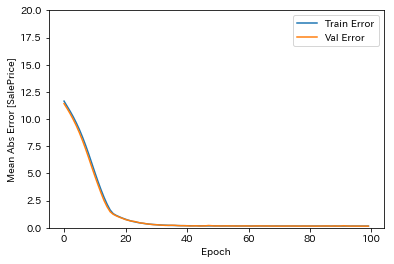

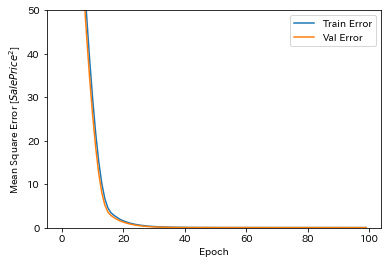

In [7]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [SalePrice]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([0,20])
    plt.show()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$SalePrice^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])
    plt.show()

plot_history(history)

In [23]:
example_batch = normed_train_data[:10]
example_result = model.predict(test_dataset[['GrLivArea', 'YearBuilt']])
example_result = np.log(example_result)

In [24]:

mean_squared_error(example_result, test_labels)

15.51274046558817

In [11]:
normed_train_data.shape

(1168, 2)

In [ ]:
#バックエンドをインポート
from keras.backend import tensorflow_backend as backend
 
#処理終了時に下記をコール
backend.clear_session()

# 【問題5】MNISTをKerasで学習

Sprint14で作成したMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train,
                    batch_size=20,
                    epochs=10,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 4s 79us/sample - loss: 0.2734 - acc: 0.9199
Epoch 2/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.1999 - acc: 0.9461
Epoch 3/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.1730 - acc: 0.9543
Epoch 4/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.1660 - acc: 0.9560
Epoch 5/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.1574 - acc: 0.9602
Epoch 6/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.1464 - acc: 0.9626
Epoch 7/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.1448 - acc: 0.96393s - ETA: 1s - loss: 0.1 - ETA: 1s - loss:
Epoch 8/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.1377 - acc: 0.96591s - loss
Epoch 9/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.13

In [6]:
# y_pred_proba = model.predict(X_train)[:, 0]
y_pred = model.predict_classes(X_test, batch_size=10)
print("y_pred", y_pred)

y_pred [7 2 1 ... 4 5 6]


In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.25930060202362365
Train accuracy: 0.9528


In [ ]:
#バックエンドをインポート
from keras.backend import tensorflow_backend as backend
 
#処理終了時に下記をコール
backend.clear_session()